<a href="https://colab.research.google.com/github/ai1138/sorry_analysis/blob/main/nlp_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class annotation:
  def __init__(self, accountability_score, apology_score, resolution_score):
    self.accountability_score = accountability_score #  score is 0 or 1
    self.apology_score = apology_score # 0 or 1
    self.resolution_score = resolution_score #0 or 1 
  
  def __eq__(self,other):
    return (self.accountability_score == other.accountability_score and self.apology_score == other.apology_score and self.resolution_score == other.resolution_score) 
  def __str__(self):
    return str(self.accountability_score) + " , "+ str(self.apology_score) + " , " + str(self.resolution_score)
  def __hash__(self):
    return hash(str(self))


In [ ]:
aila_annotate = []
sheika_annotate = []


In [ ]:
def cohen_kappa(ann1, ann2):
    """Computes Cohen kappa for pair-wise annotators.
    :param ann1: annotations provided by first annotator
    :type ann1: list
    :param ann2: annotations provided by second annotator
    :type ann2: list
    :rtype: float
    :return: Cohen kappa statistic
    """
    count = 0
    for an1, an2 in zip(ann1, ann2):
      if an1 == an2:
        count +=1
      else:
        if an1.accountability_score == an2.accountability_score:
          count += .33
        if an1.apology_score == an2.apology_score:
          count += .33
        if an1.resolution_score == an2.resolution_score:
          count += .33
    A = int(count) / len(ann1)  # observed agreement A (Po)

    uniq = set(ann1 + ann2)
    E = 0  # expected agreement E (Pe)
    for item in uniq:
        cnt1 = ann1.count(item)
        cnt2 = ann2.count(item)
        count = ((cnt1 / len(ann1)) * (cnt2 / len(ann2)))
        E += count

    return round((A - E) / (1 - E), 4)

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive/')
tweet = pd.read_csv('/content/drive/My Drive/tweets.csv',encoding='utf-8',names=["target", "id", "date", "flag","user","tweet"])


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
extr = tweet[tweet['tweet'].str.contains('sad')]
extr = extr[extr["tweet"].str.contains("sorry")].head(60)

extr['tweet'].to_csv("sad.csv")
!cp sad.csv "drive/My Drive/"

In [ ]:
extr

,target,id,date,flag,user,tweet
525,0,1467945885,Mon Apr 06 22:56:20 PDT 2009,NO_QUERY,GillianMe,"@emmaketurah i'm sorry Emma, is swarley a gol..."
714,0,1467989188,Mon Apr 06 23:08:33 PDT 2009,NO_QUERY,littlefoxy,@stephenkruiser I'm so sorry to hear that. It...
744,0,1467996852,Mon Apr 06 23:10:47 PDT 2009,NO_QUERY,greatcorbinski,@stephenkruiser awww so sad!!! I'm so sorry!!
3686,0,1468650905,Tue Apr 07 02:57:40 PDT 2009,NO_QUERY,loris_sl,@guybatty oh I'm so sorry to hear that very s...
6045,0,1469280314,Tue Apr 07 05:52:06 PDT 2009,NO_QUERY,figgybean,@ferasinatra @DonnieWsboo09 sigh i just went o...
6359,0,1469391058,Tue Apr 07 06:14:06 PDT 2009,NO_QUERY,franthomas,@OceanMommy I'm so sorry Steph. Praying for ...
6610,0,1469494445,Tue Apr 07 06:33:11 PDT 2009,NO_QUERY,campcreek,"@Sprucehillfarm @paccadoodle very sad, and i w..."
8117,0,1470072239,Tue Apr 07 08:15:52 PDT 2009,NO_QUERY,dave_dash,@lmorchard sad sorry to hear about your PomPom
9248,0,1548666785,Fri Apr 17 21:36:23 PDT 2009,NO_QUERY,faith_gal220,@robby123 I'm so sorry!!! Which dog? I'm sorr...
12900,0,1552028213,Sat Apr 18 10:35:56 PDT 2009,NO_QUERY,GuitarKat,"@dibegin Aw, that's sad. I'm sorry to read that."


In [ ]:
tweet[tweet['tweet'].str.contains('forgive')]

,target,id,date,flag,user,tweet
2249,0,1468338207,Tue Apr 07 01:03:40 PDT 2009,NO_QUERY,chrisgiovannix,I'm sorry. I've ruined everything between us. ...
2688,0,1468429718,Tue Apr 07 01:37:02 PDT 2009,NO_QUERY,lmizon,Its a grey day in London come back sun all is ...
10213,0,1550817446,Sat Apr 18 07:21:01 PDT 2009,NO_QUERY,Brit_Brit600,Katie we are so... srry! forgive us!
11554,0,1551416963,Sat Apr 18 09:00:13 PDT 2009,NO_QUERY,HelloCeryna,@MussoMitchel i am so sorry. i don't hate u pl...
15219,0,1554042820,Sat Apr 18 15:54:44 PDT 2009,NO_QUERY,Amanda_Perrin,"twitter! i feel like im running away from you,..."
...,...,...,...,...,...,...
1027058,4,1932381928,Tue May 26 21:21:19 PDT 2009,NO_QUERY,Pura_Candela,@iam_cisco Why would i hate you ? Just cus you...
1032831,4,1936026742,Wed May 27 07:19:19 PDT 2009,NO_QUERY,aniarmhi,Now they're playing 'No More Heroes' by The St...
1038185,4,1956632613,Thu May 28 22:18:51 PDT 2009,NO_QUERY,tangmarvin,"@bubblesparaiso : Actually, that is true.. we ..."
1039870,4,1956873435,Thu May 28 22:54:43 PDT 2009,NO_QUERY,Tina541,@Metally9 i forgive u!!! Lol i will blame it a...


In [ ]:
aila_df_1 = pd.read_csv('/content/drive/My Drive/output.csv',encoding='utf-8',names=["tweet", "accountability_score", "apology_score", "resolution_score"])
shnu_df_1 = pd.read_csv('/content/drive/My Drive/annotations for sheika - output.csv',encoding='utf-8',names=["tweet", "accountability_score", "apology_score", "resolution_score"])


NameError: ignored

In [ ]:
apologyFrequency = 0
accountabilityFrequency = 0
resolutionFrequency = 0 
for i in range(1,122):
  if(int(shnu_df_1["accountability_score"][i]) == 1):
    accountabilityFrequency += 1
  if(int(shnu_df_1["apology_score"][i]) == 1):
    apologyFrequency += 1
  if(int(shnu_df_1["resolution_score"][i]) == 1):
    resolutionFrequency += 1
print(apologyFrequency,accountabilityFrequency,resolutionFrequency)
  

40 16 6


In [ ]:
apologyFrequency = 0
accountabilityFrequency = 0
resolutionFrequency = 0 
for i in range(122,324):
  if(int(shnu_df_1["accountability_score"][i]) == 1):
    accountabilityFrequency += 1
  if(int(shnu_df_1["apology_score"][i]) == 1):
    apologyFrequency += 1
  if(int(shnu_df_1["resolution_score"][i]) == 1):
    resolutionFrequency += 1
print(apologyFrequency,accountabilityFrequency,resolutionFrequency)

125 98 12


In [ ]:
apologyFrequency = 0
accountabilityFrequency = 0
resolutionFrequency = 0 
for i in range(324,480):
  if(int(aila_df_1["accountability_score"][i]) == 1):
    accountabilityFrequency += 1
  if(int(aila_df_1["apology_score"][i]) == 1):
    apologyFrequency += 1
  if(int(aila_df_1["resolution_score"][i]) == 1):
    resolutionFrequency += 1
print(apologyFrequency,accountabilityFrequency,resolutionFrequency)

73 44 37


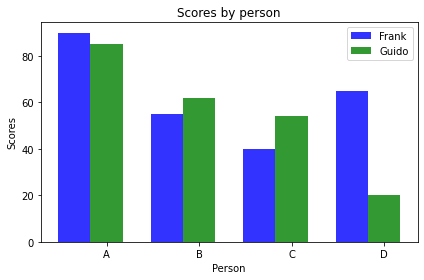

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
means_frank = (90, 55, 40, 65)
means_guido = (85, 62, 54, 20)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Frank')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='g',
label='Guido')

plt.xlabel('Person')
plt.ylabel('Scores')
plt.title('Scores by person')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
cohen_kappa(aila_annotate,sheika_annotate)

0.7519

0.325 0.225 0.0
